1. Generating samples to check K means cluster algorithm

In [1]:

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=1, random_state=42)



2. Plotting samples

Text(0.5, 1.0, 'Synthetic Dataset for Clustering')

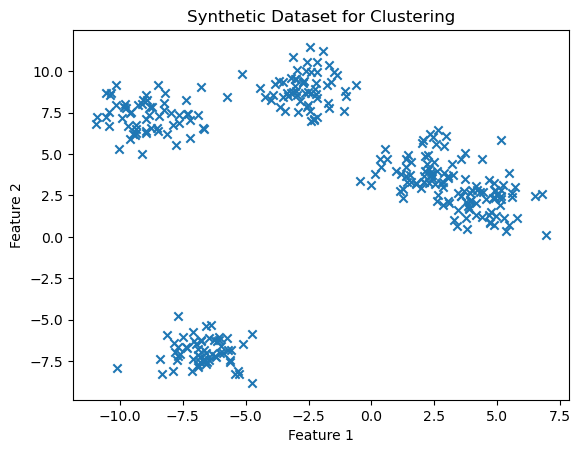

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plot = plt.scatter(X[:, 0], X[:, 1], marker ='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset for Clustering')

In [3]:
X.shape


(300, 2)

3. Create functions for initialize centroids, categorize samples according to centroids nearest and calculate mean centroid of each grouped samples

In [4]:
def initialize_centroids(X, k):
    permutation = np.random.permutation(X.shape[0])
    return np.array(X[permutation[:k]])

In [5]:
def assign_centroids(X, init_centroids):

    category = [0]*X.shape[0]
    for index, x in enumerate(X):
        dist = []
        for c in init_centroids:
            norm = np.linalg.norm(x-c)**2
            dist.append(norm)
        dist = np.array(dist)
        category[index] = np.argmin(dist)
    return np.array(category)

In [6]:
def mean_centroids(X, cats, k):
    mean_centers = []
    for i in range(k):
        grouped_X = []
        for index, cat in enumerate(cats):
            if cat == i:
                grouped_X.append(X[index])
        if len(grouped_X) > 0:
            grouped_X = np.array(grouped_X)
            mean_centers.append(grouped_X.mean(axis=0))

    return np.array(mean_centers)

4. Function for calculate cost 

In [7]:
def cost(X, cat_X, centroids):
    cost=0
    for i in range(X.shape[0]):        
        cost += np.linalg.norm(X[i]- centroids[cat_X[i]])
    cost = cost/X.shape[0]
    return cost

5. K means cluster algorthm which returns centroids of each clusters and array of their assigned centroids

In [8]:
def k_means_cluster(X, k, until_stable=True, iter=10, accuracy =5):

    costs = []
    cents = []
    cats = []
    for i in range(accuracy):
        init_centroids = initialize_centroids(X,k)
        
        prev_centroids = init_centroids
        centroids = init_centroids

        if until_stable:
            while True:
                X_categories = assign_centroids(X, prev_centroids)
                centroids = mean_centroids(X, X_categories, k)
                if np.array_equal(prev_centroids, centroids):
                    break
                prev_centroids = centroids
            cost_val = cost(X, X_categories, centroids)
            costs.append(cost_val)
            cents.append(centroids)
            cats.append(X_categories)
        else:
            for j in range(iter):
                print(f"cost_loop: {i} and iter_loop {j}")
                X_categories = assign_centroids(X, prev_centroids)
                centroids = mean_centroids(X, X_categories, k)
                prev_centroids = centroids
            cost_val = cost(X, X_categories, centroids)
            costs.append(cost_val)
            cents.append(centroids)
            cats.append(X_categories)
        
    min_cost_ind = np.argmin(np.array(costs))
    
    fin_centroids = np.array(cents[min_cost_ind])
    fin_cats = np.array(cats[min_cost_ind])
    return fin_centroids, fin_cats

6. Plot the centroids of each sample from our K means algorithm

In [9]:
centers ,cats = k_means_cluster(X,5, accuracy=50)

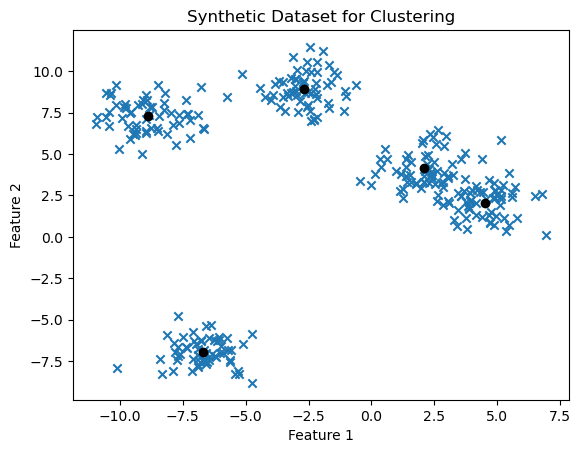

In [10]:
import numpy as np
import matplotlib.pyplot as plt


plot = plt.scatter(X[:, 0], X[:, 1], marker ='x')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black',marker ='o')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset for Clustering')

plt.show()


7. Compressing color of a JPG image using our K means cluster algorithm

7.0 Analyze the image

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("image3.jpg")

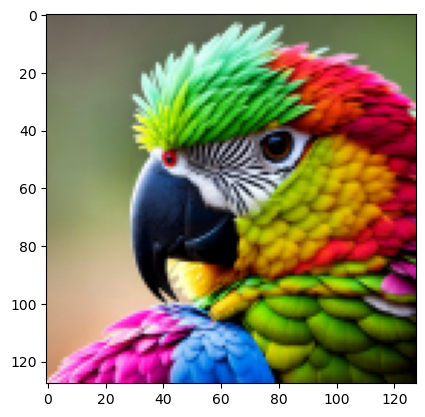

In [12]:
plt.imshow(img)

In [13]:
img.shape

(128, 128, 3)

In [14]:
img

array([[[106,  98,  87],
        [105,  97,  86],
        [104,  95,  86],
        ...,
        [ 83, 107,  57],
        [ 80, 104,  56],
        [ 81, 105,  55]],

       [[107,  99,  88],
        [105,  96,  87],
        [105,  96,  87],
        ...,
        [ 86, 109,  55],
        [ 84, 107,  53],
        [ 84, 109,  54]],

       [[109, 100,  91],
        [107,  98,  89],
        [107,  98,  89],
        ...,
        [ 87, 110,  56],
        [ 87, 110,  54],
        [ 86, 109,  57]],

       ...,

       [[206, 142, 104],
        [214, 161, 130],
        [245, 225, 226],
        ...,
        [ 15,  18,   0],
        [  9,  13,   0],
        [  5,   6,   0]],

       [[214, 161, 130],
        [246, 223, 233],
        [244, 140, 219],
        ...,
        [ 20,  22,   0],
        [ 14,  15,   1],
        [  7,   8,   0]],

       [[246, 223, 229],
        [245, 168, 224],
        [248, 198, 236],
        ...,
        [ 19,  18,   0],
        [ 14,  15,   1],
        [  7,   8,   0]]

In [15]:
img = img/255   
#this /255 should do to jpg images to get 0-255 color range between 0-1, no need for png sice they are already in that range
img

array([[[0.41568627, 0.38431373, 0.34117647],
        [0.41176471, 0.38039216, 0.3372549 ],
        [0.40784314, 0.37254902, 0.3372549 ],
        ...,
        [0.3254902 , 0.41960784, 0.22352941],
        [0.31372549, 0.40784314, 0.21960784],
        [0.31764706, 0.41176471, 0.21568627]],

       [[0.41960784, 0.38823529, 0.34509804],
        [0.41176471, 0.37647059, 0.34117647],
        [0.41176471, 0.37647059, 0.34117647],
        ...,
        [0.3372549 , 0.42745098, 0.21568627],
        [0.32941176, 0.41960784, 0.20784314],
        [0.32941176, 0.42745098, 0.21176471]],

       [[0.42745098, 0.39215686, 0.35686275],
        [0.41960784, 0.38431373, 0.34901961],
        [0.41960784, 0.38431373, 0.34901961],
        ...,
        [0.34117647, 0.43137255, 0.21960784],
        [0.34117647, 0.43137255, 0.21176471],
        [0.3372549 , 0.42745098, 0.22352941]],

       ...,

       [[0.80784314, 0.55686275, 0.40784314],
        [0.83921569, 0.63137255, 0.50980392],
        [0.96078431, 0

7.1 making 3d matrix which has R,G,B color ranges as axes

In [16]:
reshaped_img = np.reshape(img, (img.shape[0]*img.shape[1],3))

In [17]:
reshaped_img.shape


(16384, 3)

7.2 Clustering image for 16 colors, making parameters adjustment to get a good clustering(but using until stable can make algorithm run larger time for larger data)

In [18]:
X_img = reshaped_img
centers, cats = k_means_cluster(X_img, 16, until_stable= False, iter = 10, accuracy=5)

cost_loop: 0 and iter_loop 0
cost_loop: 0 and iter_loop 1
cost_loop: 0 and iter_loop 2
cost_loop: 0 and iter_loop 3
cost_loop: 0 and iter_loop 4
cost_loop: 0 and iter_loop 5
cost_loop: 0 and iter_loop 6
cost_loop: 0 and iter_loop 7
cost_loop: 0 and iter_loop 8
cost_loop: 0 and iter_loop 9
cost_loop: 1 and iter_loop 0
cost_loop: 1 and iter_loop 1
cost_loop: 1 and iter_loop 2
cost_loop: 1 and iter_loop 3
cost_loop: 1 and iter_loop 4
cost_loop: 1 and iter_loop 5
cost_loop: 1 and iter_loop 6
cost_loop: 1 and iter_loop 7
cost_loop: 1 and iter_loop 8
cost_loop: 1 and iter_loop 9
cost_loop: 2 and iter_loop 0
cost_loop: 2 and iter_loop 1
cost_loop: 2 and iter_loop 2
cost_loop: 2 and iter_loop 3
cost_loop: 2 and iter_loop 4
cost_loop: 2 and iter_loop 5
cost_loop: 2 and iter_loop 6
cost_loop: 2 and iter_loop 7
cost_loop: 2 and iter_loop 8
cost_loop: 2 and iter_loop 9
cost_loop: 3 and iter_loop 0
cost_loop: 3 and iter_loop 1
cost_loop: 3 and iter_loop 2
cost_loop: 3 and iter_loop 3
cost_loop: 3 a

In [19]:
centers.shape

(16, 3)

In [20]:
cats.shape

(16384,)

7.4 Apply 16 colors which grouped to our pixels replacing previous colores 

In [21]:
color_reduced = centers[cats, :]

img_reduced = np.reshape(color_reduced, img.shape)

In [22]:
img_reduced 

array([[[0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        ...,
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386]],

       [[0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        ...,
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386]],

       [[0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        ...,
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386],
        [0.38678075, 0.4269899 , 0.30797386]],

       ...,

       [[0.82911686, 0.71585171, 0.5655978 ],
        [0.82911686, 0.71585171, 0.5655978 ],
        [0.84487142, 0

7.5 Plot the images and compare

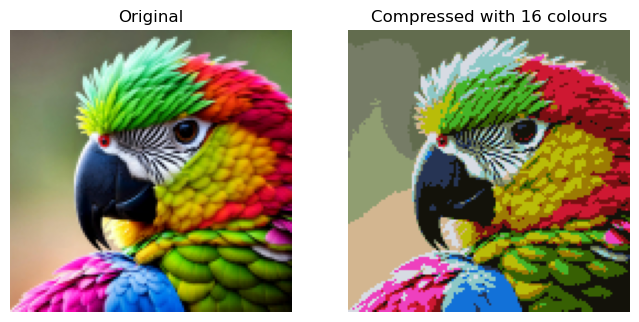

In [23]:

fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].set_axis_off()


ax[1].imshow(img_reduced)
ax[1].set_title('Compressed with 16 colours')
ax[1].set_axis_off()